In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import dandelion as ddl
sc.logging.print_header()

warnings.filterwarnings('ignore')
os.chdir('/lustre/scratch117/cellgen/team297/kt16/Ziad/scanpy')

scanpy==1.6.0 anndata==0.7.4 umap==0.4.6 numpy==1.18.5 scipy==1.4.1 pandas==1.1.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.7.1 leidenalg==0.8.2


In [2]:
rna = sc.read_h5ad('h5ad/adata_soupx_trans_cite_rna.h5ad')
adata = sc.read_h5ad('h5ad/adata_soupx_trans_cite_raw.h5ad')
adata2 = sc.read_h5ad('h5ad/adata_soupx_trans_raw.h5ad')
adata3 = sc.read_h5ad('h5ad/adata_soupx_trans_cite_bgshift_raw.h5ad')

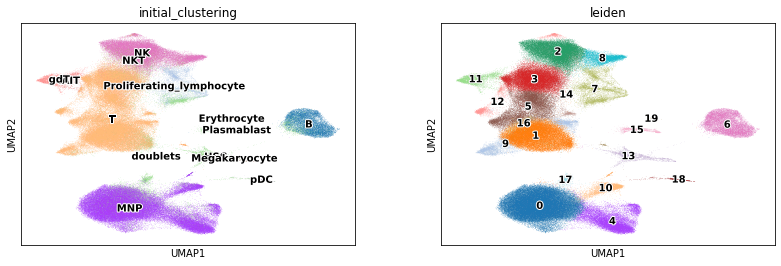

In [3]:
sc.pl.umap(rna, color=['initial_clustering', 'leiden'], legend_loc ='on data', legend_fontoutline=2, ncols = 2)

## give major celltypes a fine annotation

In [4]:
rna.obs['fine_clustering'] = rna.obs['initial_clustering']

In [52]:
# clean up each major celltype
rnax = rna[(rna.obs['initial_clustering'].isin(['MNP']))].raw.to_adata().copy()
# Identify highly-variable genes
sc.pp.highly_variable_genes(rnax, min_mean = 0.0125, max_mean = 3, min_disp = 0.5)
## remove TRBV/TRAV and IGHV/IGLV/IGKV from the highly variable genes
# import re
# for i in rnax.var.index:
#     if re.search('^TR[AB][VDJ]', i):
#         rnax.var.at[i, 'highly_variable'] = False
# sc.pl.highly_variable_genes(rnax)
# stash the normalized data in raw
rnax.raw = rnax
# filter to only highly variable
rnax = rnax[:, rnax.var['highly_variable']]

In [53]:
import multiprocessing
# regress and scale for PCA
sc.pp.regress_out(rnax, ['total_counts', 'pct_counts_mt'], n_jobs = multiprocessing.cpu_count()-1)
sc.pp.scale(rnax, max_value = 10)
sc.tl.pca(rnax, svd_solver = 'arpack')

In [54]:
# run harmony. compute the neighborhood graph.
sc.external.pp.harmony_integrate(rnax, key='study_id')
sc.pp.neighbors(rnax, use_rep = 'X_pca_harmony')

2021-01-22 02:13:01,037 - harmonypy - INFO - Iteration 1 of 10
2021-01-22 02:13:31,447 - harmonypy - INFO - Iteration 2 of 10
2021-01-22 02:14:02,229 - harmonypy - INFO - Converged after 2 iterations


In [55]:
# run UMAP
sc.tl.umap(rnax, min_dist = 0.3)

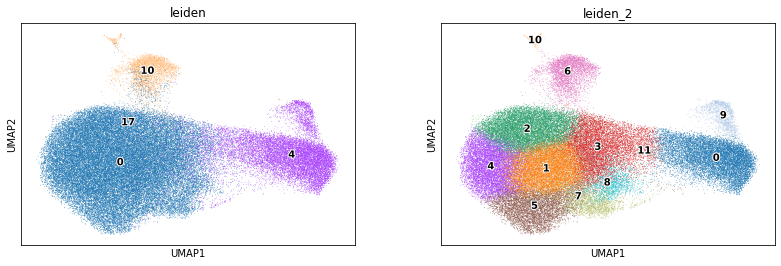

In [56]:
# find clusters
sc.tl.leiden(rnax, key_added = 'leiden_2')
sc.pl.umap(rnax, color=['leiden', 'leiden_2'], legend_loc ='on data', legend_fontoutline=2)

In [57]:
# quick marker gene test
sc.tl.rank_genes_groups(rnax, groupby = 'leiden_2')

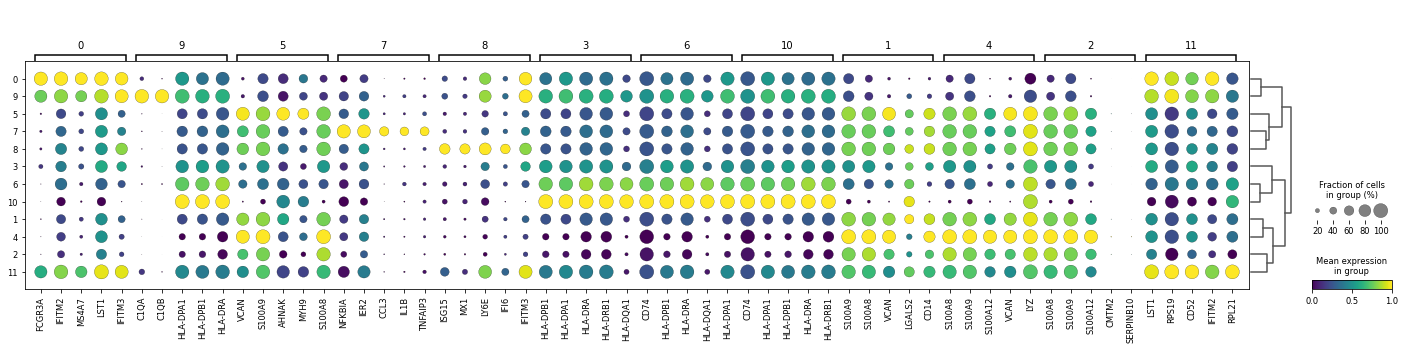

In [69]:
sc.pl.rank_genes_groups_dotplot(rnax, n_genes = 5, standard_scale = 'var', color_map = 'viridis', min_logfoldchange=1)

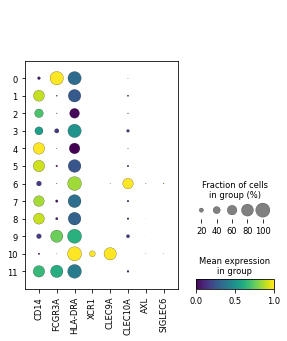

In [68]:
sc.pl.dotplot(rnax, ['CD14', 'FCGR3A', 'HLA-DRA', 'XCR1', 'CLEC9A', 'CLEC10A', 'AXL', 'SIGLEC6'], groupby = 'leiden_2', color_map = 'viridis', standard_scale = 'var')

In [71]:
newdict = {'0':'Non-classical_mono',
'1':'Classical_mono',
'2':'Classical_mono',
'3':'Classical_mono',
'4':'Classical_mono',
'5':'Classical_mono',
'6':'cDC2',
'7':'Classical_mono',
'8':'Classical_mono',
'9':'Non-classical_mono_C1Q+',
'10':'cDC1',
'11':'Intermediate_mono'}
rnax.obs['fine_clustering'] = [newdict[l] for l in rnax.obs['leiden_2']]
rna.obs['fine_clustering'] = rna.obs['fine_clustering'].astype('object')
rna.obs['fine_clustering'].update(rnax.obs['fine_clustering'].astype('object'))
adata.obs = rna.obs.copy()
adata2.obs = rna.obs.copy()
adata3.obs = rna.obs.copy()

... storing 'fine_clustering' as categorical


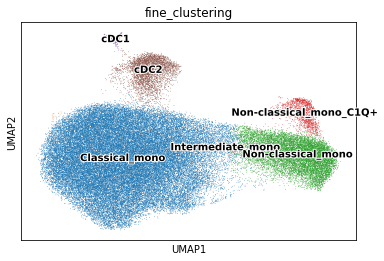

In [72]:
sc.pl.umap(rnax, color = 'fine_clustering', legend_loc ='on data', legend_fontoutline=2)

## T

In [73]:
# clean up each major celltype
rnax = rna[(rna.obs['initial_clustering'].isin(['T']))].raw.to_adata().copy()
# Identify highly-variable genes
sc.pp.highly_variable_genes(rnax, min_mean = 0.0125, max_mean = 3, min_disp = 0.5)
## remove TRBV/TRAV and IGHV/IGLV/IGKV from the highly variable genes
import re
for i in rnax.var.index:
    if re.search('^TR[AB][VDJ]', i):
        rnax.var.at[i, 'highly_variable'] = False
# sc.pl.highly_variable_genes(rnax)
# stash the normalized data in raw
rnax.raw = rnax
# filter to only highly variable
rnax = rnax[:, rnax.var['highly_variable']]

In [74]:
import multiprocessing
# regress and scale for PCA
sc.pp.regress_out(rnax, ['total_counts', 'pct_counts_mt'], n_jobs = multiprocessing.cpu_count()-1)
sc.pp.scale(rnax, max_value = 10)
sc.tl.pca(rnax, svd_solver = 'arpack')

Trying to set attribute `.obs` of view, copying.
... storing 'fine_clustering' as categorical


In [75]:
# run harmony. compute the neighborhood graph.
sc.external.pp.harmony_integrate(rnax, key='study_id')
sc.pp.neighbors(rnax, use_rep = 'X_pca_harmony')

2021-01-22 02:27:21,037 - harmonypy - INFO - Iteration 1 of 10
2021-01-22 02:27:52,613 - harmonypy - INFO - Iteration 2 of 10
2021-01-22 02:28:24,514 - harmonypy - INFO - Iteration 3 of 10
2021-01-22 02:28:56,368 - harmonypy - INFO - Iteration 4 of 10
2021-01-22 02:29:12,875 - harmonypy - INFO - Iteration 5 of 10
2021-01-22 02:29:23,751 - harmonypy - INFO - Converged after 5 iterations


In [76]:
# run UMAP
sc.tl.umap(rnax, min_dist = 0.3)

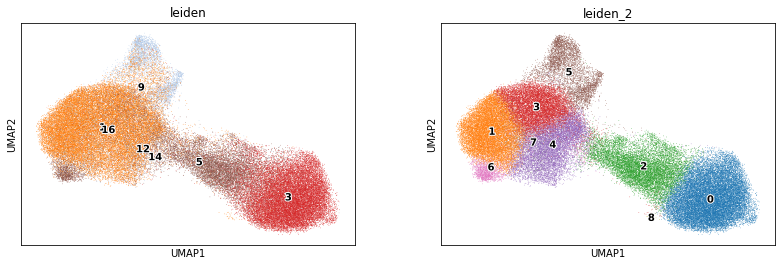

In [77]:
# find clusters
sc.tl.leiden(rnax, key_added = 'leiden_2')
sc.pl.umap(rnax, color=['leiden', 'leiden_2'], legend_loc ='on data', legend_fontoutline=2)

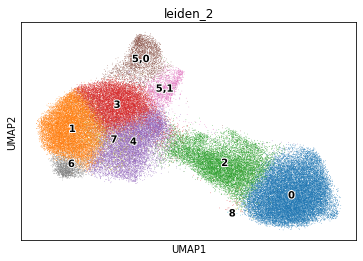

In [78]:
sc.tl.leiden(rnax, restrict_to = ('leiden_2', ['5']), resolution = .3, key_added = 'leiden_2')
sc.pl.umap(rnax, color=['leiden_2'], legend_loc ='on data', legend_fontoutline=2)

In [79]:
# quick marker gene test
sc.tl.rank_genes_groups(rnax, groupby = 'leiden_2')

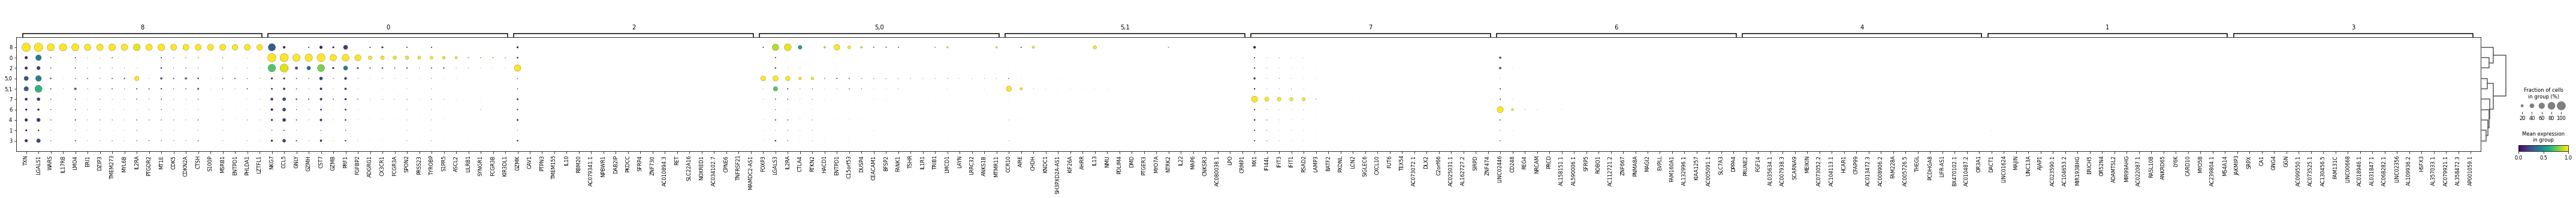

In [80]:
sc.pl.rank_genes_groups_dotplot(rnax, n_genes = 20, standard_scale = 'var', color_map = 'viridis', min_logfoldchange=4)

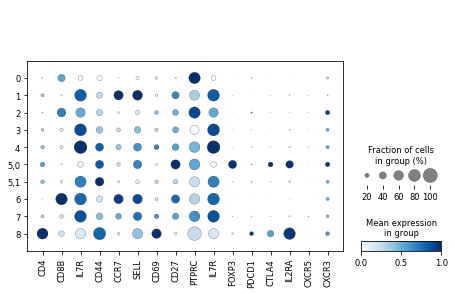

In [85]:
sc.pl.dotplot(rnax, ['CD4', 'CD8B', 'IL7R', 'CD44', 'CCR7', 'SELL', 'CD69', 'CD27', 'PTPRC', 'IL7R', 'FOXP3', 'PDCD1', 'CTLA4', 'IL2RA', 'CXCR5', 'CXCR3'], groupby = 'leiden_2', color_map = 'Blues', standard_scale = 'var')

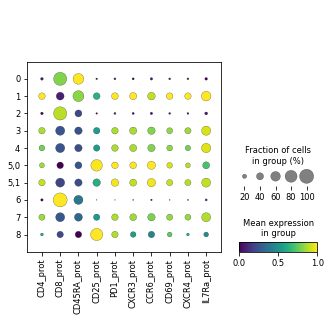

In [84]:
adatax = adata3[adata3.obs_names.isin(rnax.obs_names)].copy()
adatax = adatax[:, adatax.var.feature_types == 'Antibody Capture']
adatax.obs = rnax.obs.copy()
adatax.obsm = rnax.obsm.copy()
adatax.obsp = rnax.obsp.copy()
sc.pl.dotplot(adatax, [i for i in adatax.var.index], groupby = 'leiden_2', color_map = 'viridis', standard_scale = 'var')

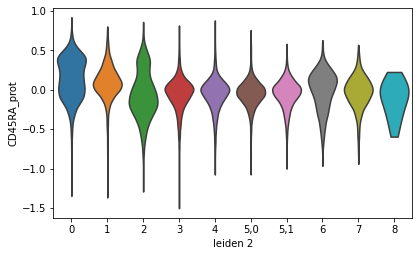

In [88]:
sc.pl.violin(adatax, ['CD45RA_prot'], groupby = 'leiden_2', standard_scale = 'var', size = 0)

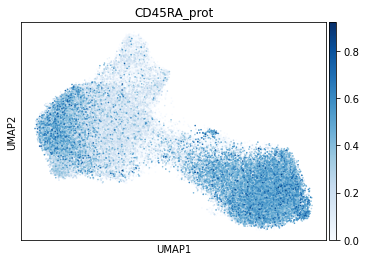

In [83]:
sc.pl.umap(adatax, color=['CD45RA_prot'], legend_loc ='on data', legend_fontoutline=2, vmin = 0, size = 10, color_map = 'Blues')

In [93]:
newdict = {'0':'CD8_Temra',
'1':'CD4_Tnaive',
'2':'CD8_Tem',
'3':'CD4_Tcm',
'4':'CD4_Tcm',
'5,0':'CD4_Treg',
'5,1':'CD4_Tem',
'6':'CD8_Tnaive',
'7':'CD4_Tcm',
'8':'CD4_CD25_IL17RB_T/NKT',}
rnax.obs['fine_clustering'] = [newdict[l] for l in rnax.obs['leiden_2']]
rna.obs['fine_clustering'] = rna.obs['fine_clustering'].astype('object')
rna.obs['fine_clustering'].update(rnax.obs['fine_clustering'].astype('object'))
adata.obs = rna.obs.copy()
adata2.obs = rna.obs.copy()
adata3.obs = rna.obs.copy()

... storing 'fine_clustering' as categorical


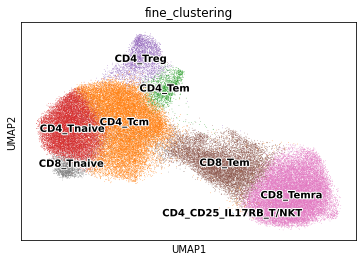

In [94]:
sc.pl.umap(rnax, color = 'fine_clustering', legend_loc ='on data', legend_fontoutline=2)

## NK

In [95]:
# clean up each major celltype
rnax = rna[(rna.obs['initial_clustering'].isin(['NK', 'NKT']))].raw.to_adata().copy()
# Identify highly-variable genes
sc.pp.highly_variable_genes(rnax, min_mean = 0.0125, max_mean = 3, min_disp = 0.5)
## remove TRBV/TRAV and IGHV/IGLV/IGKV from the highly variable genes
# import re
# for i in rnax.var.index:
#     if re.search('^TR[AB][VDJ]', i):
#         rnax.var.at[i, 'highly_variable'] = False
# sc.pl.highly_variable_genes(rnax)
# stash the normalized data in raw
rnax.raw = rnax
# filter to only highly variable
rnax = rnax[:, rnax.var['highly_variable']]

In [96]:
import multiprocessing
# regress and scale for PCA
sc.pp.regress_out(rnax, ['total_counts', 'pct_counts_mt'], n_jobs = multiprocessing.cpu_count()-1)
sc.pp.scale(rnax, max_value = 10)
sc.tl.pca(rnax, svd_solver = 'arpack')

Trying to set attribute `.obs` of view, copying.
... storing 'fine_clustering' as categorical


In [97]:
# run harmony. compute the neighborhood graph.
sc.external.pp.harmony_integrate(rnax, key='study_id')
sc.pp.neighbors(rnax, use_rep = 'X_pca_harmony')

2021-01-22 02:47:09,974 - harmonypy - INFO - Iteration 1 of 10
2021-01-22 02:47:20,895 - harmonypy - INFO - Iteration 2 of 10
2021-01-22 02:47:31,684 - harmonypy - INFO - Converged after 2 iterations


In [98]:
# run UMAP
sc.tl.umap(rnax, min_dist = 0.3)

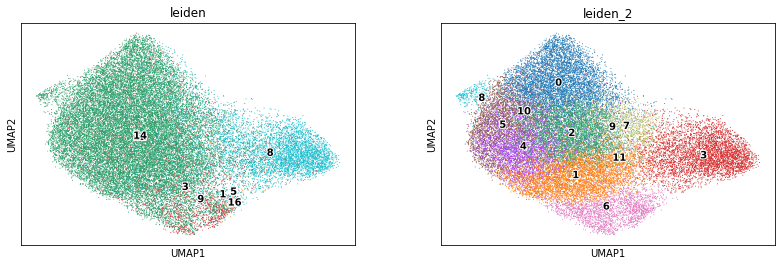

In [99]:
# find clusters
sc.tl.leiden(rnax, key_added = 'leiden_2')
sc.pl.umap(rnax, color=['leiden', 'leiden_2'], legend_loc ='on data', legend_fontoutline=2)

In [100]:
# quick marker gene test
sc.tl.rank_genes_groups(rnax, groupby = 'leiden_2')

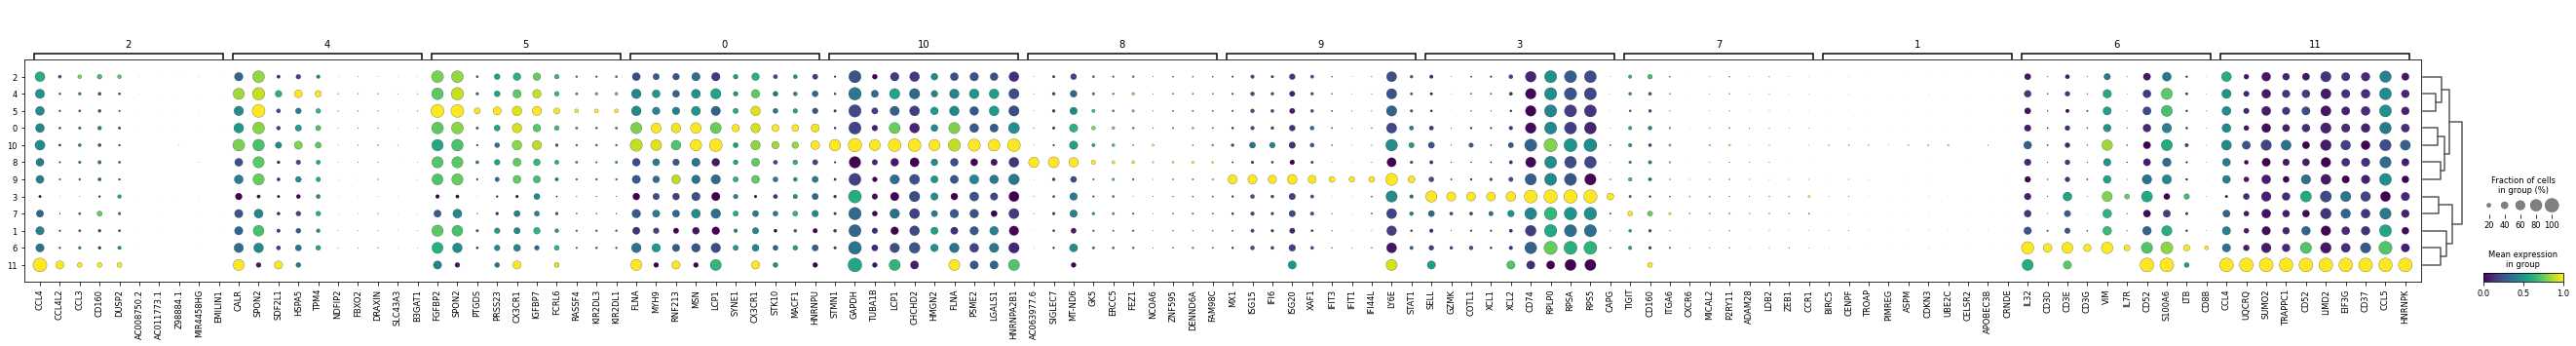

In [101]:
sc.pl.rank_genes_groups_dotplot(rnax, n_genes = 10, standard_scale = 'var', color_map = 'viridis', min_logfoldchange=1)

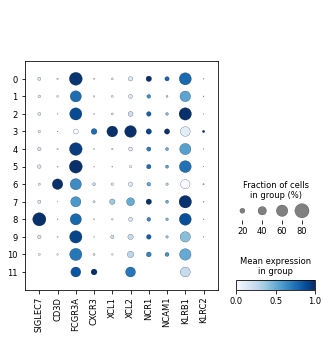

In [106]:
sc.pl.dotplot(rnax, ['SIGLEC7', 'CD3D','FCGR3A', 'CXCR3', 'XCL1', 'XCL2', 'NCR1', 'NCAM1', 'KLRB1', 'KLRC2'], groupby = 'leiden_2', color_map = 'Blues', standard_scale = 'var')

In [107]:
newdict = {'0':'CD16pos_NK',
'1':'CD16pos_NK',
'2':'CD16pos_NK',
'3':'CD16neg_NK',
'4':'CD16pos_NK',
'5':'CD16pos_NK',
'6':'NKT',
'7':'CD16pos_NK',
'8':'CD16pos_SIGLEC7_NK',
'9':'CD16pos_NK',
'10':'CD16pos_NK',
'11':'CD16pos_NK',}
rnax.obs['fine_clustering'] = [newdict[l] for l in rnax.obs['leiden_2']]
rna.obs['fine_clustering'] = rna.obs['fine_clustering'].astype('object')
rna.obs['fine_clustering'].update(rnax.obs['fine_clustering'].astype('object'))
adata.obs = rna.obs.copy()
adata2.obs = rna.obs.copy()
adata3.obs = rna.obs.copy()

... storing 'fine_clustering' as categorical


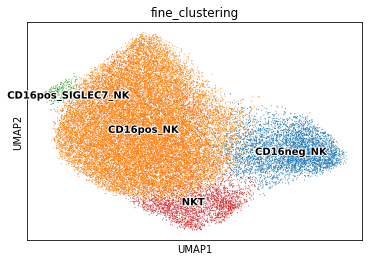

In [108]:
sc.pl.umap(rnax, color = 'fine_clustering', legend_loc ='on data', legend_fontoutline=2)

## gdT

In [141]:
# clean up each major celltype
rnax = rna[(rna.obs['initial_clustering'].isin(['gdT']))].raw.to_adata().copy()
# Identify highly-variable genes
sc.pp.highly_variable_genes(rnax, min_mean = 0.0125, max_mean = 3, min_disp = 0.5)
## remove TRBV/TRAV and IGHV/IGLV/IGKV from the highly variable genes
# import re
# for i in rnax.var.index:
#     if re.search('^TR[AB][VDJ]', i):
#         rnax.var.at[i, 'highly_variable'] = False
# sc.pl.highly_variable_genes(rnax)
# stash the normalized data in raw
rnax.raw = rnax
# filter to only highly variable
rnax = rnax[:, rnax.var['highly_variable']]

In [142]:
import multiprocessing
# regress and scale for PCA
sc.pp.regress_out(rnax, ['total_counts', 'pct_counts_mt'], n_jobs = multiprocessing.cpu_count()-1)
sc.pp.scale(rnax, max_value = 10)
sc.tl.pca(rnax, svd_solver = 'arpack')

Trying to set attribute `.obs` of view, copying.
... storing 'fine_clustering' as categorical


In [143]:
# run harmony. compute the neighborhood graph.
# sc.external.pp.harmony_integrate(rnax, key='study_id')
# sc.pp.neighbors(rnax, use_rep = 'X_pca_harmony')
sc.external.pp.bbknn(rnax, batch_key='study_id')

In [144]:
# run UMAP
sc.tl.umap(rnax, min_dist = 0.3)

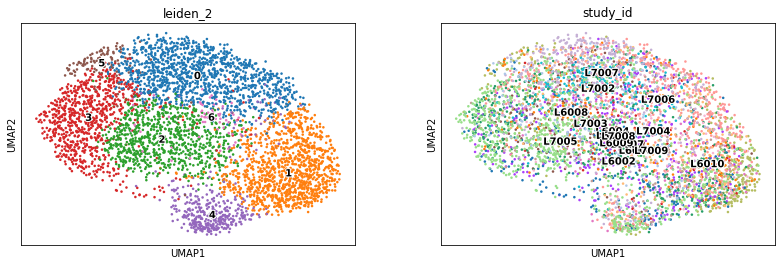

In [155]:
# find clusters
sc.tl.leiden(rnax, key_added = 'leiden_2')
sc.pl.umap(rnax, color=['leiden_2', 'study_id'], legend_loc ='on data', legend_fontoutline=2)

In [146]:
# quick marker gene test
sc.tl.rank_genes_groups(rnax, groupby = 'leiden_2')

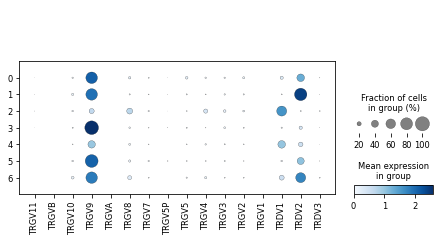

In [158]:
sc.pl.dotplot(rnax, [i for i in rnax.raw.var.index if re.search('TR[GD]V', i)], groupby = 'leiden_2', color_map = 'Blues')

In [159]:
newdict = {'0':'Vd2_gdT',
'1':'Vd2_gdT',
'2':'Vd1_gdT',
'3':'Vd2_gdT',
'4':'Vd1_gdT',
'5':'Vd2_gdT',
'6':'Vd2_gdT',}
rnax.obs['fine_clustering'] = [newdict[l] for l in rnax.obs['leiden_2']]
rna.obs['fine_clustering'] = rna.obs['fine_clustering'].astype('object')
rna.obs['fine_clustering'].update(rnax.obs['fine_clustering'].astype('object'))
adata.obs = rna.obs.copy()
adata2.obs = rna.obs.copy()
adata3.obs = rna.obs.copy()

... storing 'fine_clustering' as categorical


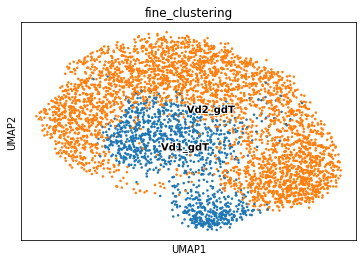

In [160]:
sc.pl.umap(rnax, color = 'fine_clustering', legend_loc ='on data', legend_fontoutline=2)

## B plasmablast

In [3]:
# clean up each major celltype
rnax = rna[(rna.obs['initial_clustering'].isin(['B', 'Plasmablast']))].raw.to_adata().copy()
# Identify highly-variable genes
sc.pp.highly_variable_genes(rnax, min_mean = 0.0125, max_mean = 3, min_disp = 0.5)
## remove TRBV/TRAV and IGHV/IGLV/IGKV from the highly variable genes
import re
for i in rnax.var.index:
    if re.search('^IG[HKL][VDJC]', i):
        rnax.var.at[i, 'highly_variable'] = False
# sc.pl.highly_variable_genes(rnax)
# stash the normalized data in raw
rnax.raw = rnax
# filter to only highly variable
rnax = rnax[:, rnax.var['highly_variable']]

In [4]:
import multiprocessing
# regress and scale for PCA
sc.pp.regress_out(rnax, ['total_counts', 'pct_counts_mt'], n_jobs = multiprocessing.cpu_count()-1)
sc.pp.scale(rnax, max_value = 10)
sc.tl.pca(rnax, svd_solver = 'arpack')

In [5]:
# run harmony. compute the neighborhood graph.
sc.external.pp.harmony_integrate(rnax, key='study_id')
sc.pp.neighbors(rnax, use_rep = 'X_pca_harmony')
# sc.external.pp.bbknn(rnax, batch_key='study_id')

2021-01-22 09:44:12,899 - harmonypy - INFO - Iteration 1 of 10
2021-01-22 09:44:17,667 - harmonypy - INFO - Iteration 2 of 10
2021-01-22 09:44:21,029 - harmonypy - INFO - Iteration 3 of 10
2021-01-22 09:44:23,559 - harmonypy - INFO - Iteration 4 of 10
2021-01-22 09:44:25,366 - harmonypy - INFO - Iteration 5 of 10
2021-01-22 09:44:27,241 - harmonypy - INFO - Iteration 6 of 10
2021-01-22 09:44:28,738 - harmonypy - INFO - Iteration 7 of 10
2021-01-22 09:44:30,248 - harmonypy - INFO - Iteration 8 of 10
2021-01-22 09:44:31,795 - harmonypy - INFO - Iteration 9 of 10
2021-01-22 09:44:33,489 - harmonypy - INFO - Converged after 9 iterations


In [6]:
# run UMAP
sc.tl.umap(rnax, min_dist = 0.3)

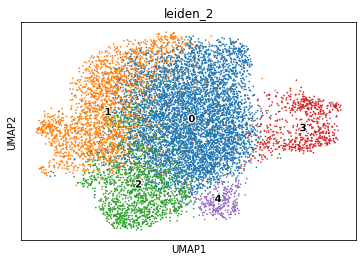

In [7]:
# find clusters
sc.tl.leiden(rnax, key_added = 'leiden_2', resolution = .6)
sc.pl.umap(rnax, color=['leiden_2'], legend_loc ='on data', legend_fontoutline=2)

In [8]:
# quick marker gene test
sc.tl.rank_genes_groups(rnax, groupby = 'leiden_2')

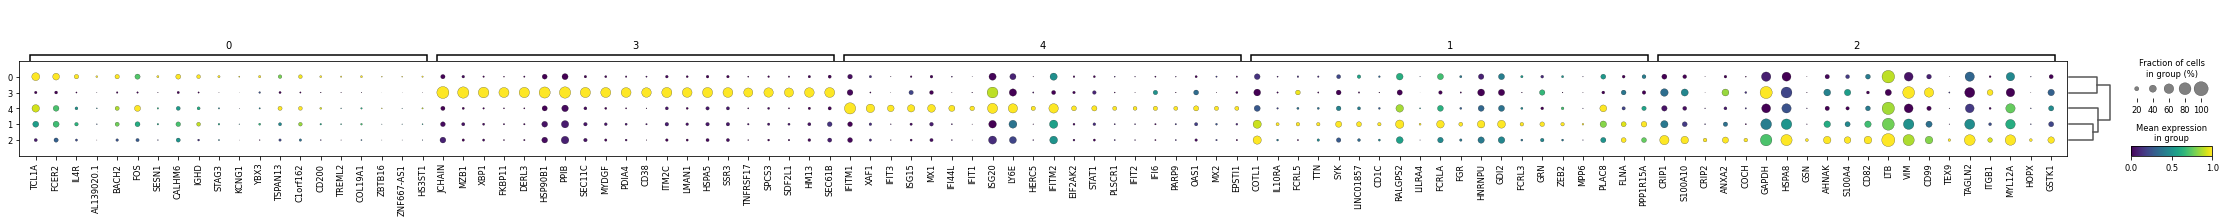

In [9]:
sc.pl.rank_genes_groups_dotplot(rnax, n_genes = 20, standard_scale = 'var', color_map = 'viridis', min_logfoldchange=.58)

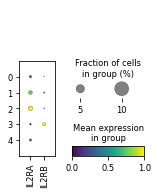

In [10]:
sc.pl.dotplot(rnax, ['IL2RA', 'IL2RB'], groupby = 'leiden_2', color_map = 'viridis', standard_scale = 'var')


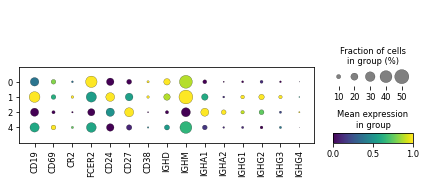

In [11]:
sc.pl.dotplot(rnax[~(rnax.obs['leiden_2'] == '3')], ['CD19', 'CD69', 'CR2', 'FCER2', 'CD24', 'CD27', 'CD38', 'IGHD', 'IGHM', 'IGHA1', 'IGHA2', 'IGHG1', 'IGHG2', 'IGHG3', 'IGHG4'], groupby = 'leiden_2', color_map = 'viridis', standard_scale = 'var')


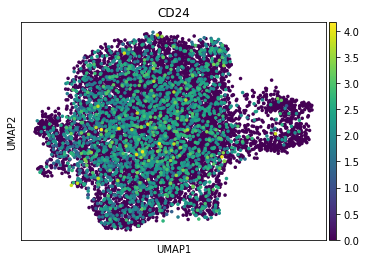

In [12]:
sc.pl.umap(rnax, color=['CD24'], legend_loc ='on data', legend_fontoutline=2, size = 50)

In [14]:
newdict = {'0':'B_naive',
'1':'B_non-switched_memory',
'2':'B_switched_memory',
'3':'Plasmablast',
'4':'B_naive'}
rnax.obs['fine_clustering'] = [newdict[l] for l in rnax.obs['leiden_2']]
rna.obs['fine_clustering'] = rna.obs['fine_clustering'].astype('object')
rna.obs['fine_clustering'].update(rnax.obs['fine_clustering'].astype('object'))
adata.obs = rna.obs.copy()
adata2.obs = rna.obs.copy()
adata3.obs = rna.obs.copy()

... storing 'fine_clustering' as categorical


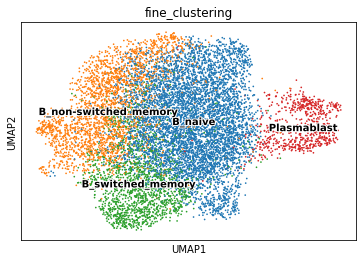

In [15]:
sc.pl.umap(rnax, color = 'fine_clustering', legend_loc ='on data', legend_fontoutline=2)

... storing 'fine_clustering' as categorical


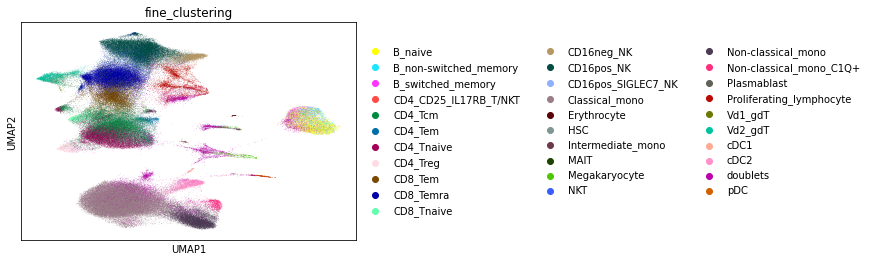

In [16]:
sc.pl.umap(adata, color = 'fine_clustering')

In [17]:
# save temporarily
rna.write('h5ad/adata_soupx_trans_cite_rna.h5ad', compression = 'gzip')
adata.write('h5ad/adata_soupx_trans_cite_raw.h5ad', compression = 'gzip')
adata2.write('h5ad/adata_soupx_trans_raw.h5ad', compression = 'gzip')
adata3.write('h5ad/adata_soupx_trans_cite_bgshift_raw.h5ad', compression = 'gzip')

... storing 'fine_clustering' as categorical
... storing 'fine_clustering' as categorical
... storing 'fine_clustering' as categorical
